# Prey-predator model

Prey-Predator (also known in literature as Lotka-Volterra model) is a popular model to study dynamics of a system consisting of two antogonists, in this case rabbits (prey) and foxes (predator).

The dynamics of the sytem are determined by interactions within and between the prey and predator populations. The intra-species interactions are (natural) birth and (natural) death rates, while inter-species interactions are the predation of prey (i.e. predator 'eats' prey for its survival!). Let $X$ denote the population size of prey and $Y$ denote the popluation size of predator.



For the population  dynamics of the prey: prey replicates at a rate that is controlled by abundance of the natural resources (rabbits need grass); we assume that these natural resources are abundant and remain at the same level throughout. Prey might die of natural causes (old age) or is eaten by predator. Thus the dynamics are reasonably modeled as:
$$ \frac{dX}{dt} = \alpha X - \beta X Y $$

For the population dynamics of predator: population of predator is expected increase linearly with its own size, and also on the population size of prey (since it needs prey as food). The natural death rate of the population depends on its own population size. Thus prey population size dynamics may be modeled as:
$$ \frac{dY}{dt} = \gamma X Y - \delta Y $$

Clearly the dynamics of the model are dependent on the four positive constants $\alpha,~\beta,~\gamma$, and $\delta$, which are to be inferred from the feild data.

We will study and understand the population dynamics of this model (i.e. $X(t)$ and $Y(t)$). We will set these four parameters to value of 1.

## Summary of tasks
1. [__For the model, set parameter values__](#parameters)
2. [__Plot of rate vector field__](#vectorfield)
3. [__Find steady states__](#steadystates)
3. [__Time evolution of system__](#timeevolution)
4. [__Find Jacobian__](#jacobian)
4. [__Brief interlude: Geometric Intepretation of matrix operation__](#geometric)
5. [__Find eigen values and eigen vectors for Jacobain Matrix__](#eigensystem)

## <a id='parameters'>Task-1: Set by hand the value of the 4 parameter values from the last four digits of your IIIT roll number</a>

Add 1 to each digit and multiply by 2 and set this value to the parameters.

alternatively: use $(\alpha,\beta,\gamma,\delta)=(2,1,1,2)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy

In [2]:
params=(2.,1.,1.,2.)


## <a id='vectorfield'>Task-2: Plot the vector $\left(\frac{dX}{dt},\frac{dY}{dt}\right)$ in XY plane</a>

From the this plot, qualitatively say what is the behaviour!


Hints (that *might* be useful for you to organize):
1. It will be useful for later to write the function `rate_vector(r,t,*cons)` where `r` is the list [X,Y], `t` is time (dummy for now) and `cons` is the __tuple__ of parameters; output will be the list $\left[\frac{dX}{dt}, \frac{dY}{dt}\right]$
1. The x-range and y-range are to be determined by the steady state position determined in previous task.
2. For plotting the arrows use the function `arrow(x,y,dx,dy)` to draw arrow from point $(x,y)$ to point $(x+dx,y+dy)$.

In [3]:
def rate_vector(pos_vector, t, *cons):
  '''Given the pos_vecotr = (x,y), time t and the constants (alpha,beta,gamma,delta), find the rate vector (dX/dt, dY/dt) '''
  return [cons[0]*pos_vector[0] - cons[1]*pos_vector[0]*pos_vector[1], -cons[3]*pos_vector[1] + cons[2]*pos_vector[0]*pos_vector[1]]

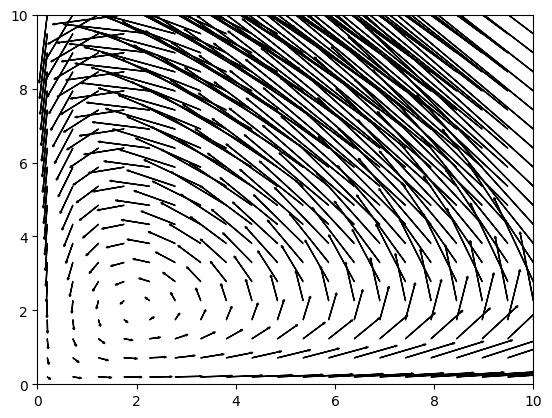

In [4]:
plt.xlim(0,10)
plt.ylim(0,10)
for x in np.linspace(0.2,10,20):
    for y in np.linspace(0.2,10,20):
        rate=rate_vector([x,y],1,*params)
        plt.arrow(x,y,rate[0]/10,rate[1]/10,head_length=0.05, head_width=0.04)




## <a id='steadystates'>Task-3: Find the steady states (where $$\left(\frac{dX}{dt},\frac{dY}{dt}\right)=(0,0)$$) by numerically solving the two coupled equations for the two unknowns $X,Y$</a>


In [5]:
# Uuse scipy.optimize.fsolve as given below 
steadystate_nontrivial = scipy.optimize.fsolve(rate_vector, [100,100], args=(1, *params))
steadystate_trivial = scipy.optimize.fsolve(rate_vector, [1,1], args=(1,*params))

In [6]:
print(steadystate_nontrivial, steadystate_trivial)

[2. 2.] [0. 0.]



## <a id='timeevolution'>Task-4: Integrate the rate laws and find the evolution of system</a>
Plot $X(t)$ and $Y(t)$ for some choosen values of $X(t=0)$ and $Y(t=0)$. And describe its behaviour in your own words.

Hint: use `scipy.integrate.odeint` function

# Answer

Here, we are integrating the rate law equations of the prey-predator model. The rate laws are given by:
$$ \frac{dX}{dt} = \alpha X - \beta X Y $$
$$ \frac{dY}{dt} = \gamma X Y - \delta Y $$
where $\alpha,~\beta,~\gamma$, and $\delta$ are the parameters of the model.

We will use the `odeint` function from the `scipy.integrate` module to integrate the rate laws and solve the ODEs(Ordinary Differential Equations) numerically.

The final answers turn out to be periodic, as evident from the plots of $X(t)$ and $Y(t)$. The population of prey and predator oscillates between high and low values. The oscillations are out of phase, i.e. when the population of prey is high, the population of predator is low and vice versa. The oscillations are sustained over time, indicating that the system is stable.

However if the initial conditions are such that it leads to unstable system, the population of prey and predator will grow without bound or will go to zero. This may happen if either/both of the populations are initially very low or very high. In such cases, the system is unstable and the populations will not be sustained over time.

The below graphs depict a stable system, where the populations of prey and predator oscillate between high and low values periodically. Plotting `X(t)` and `Y(t)` against each other, we obtain a limit cycle, which is a closed curve in the phase space. This closed curve represents the periodic behaviour of the system.

In [7]:
import scipy.integrate

In [8]:
t=np.linspace(0,20,200)
r0=[1.,1.]
sol=scipy.integrate.odeint(rate_vector,r0,t,args=params)

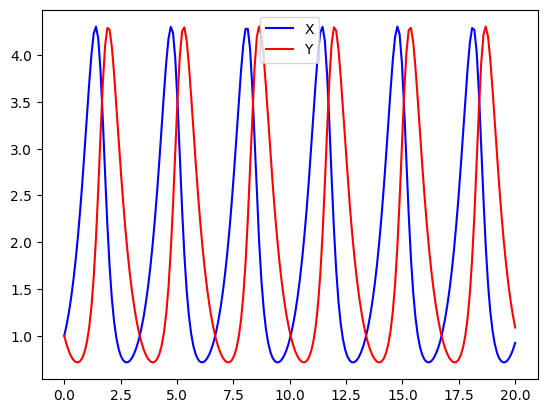

In [9]:
plt.plot(t,sol[:,0],'b',label='X')
plt.plot(t,sol[:,1],'r',label='Y')
plt.legend()

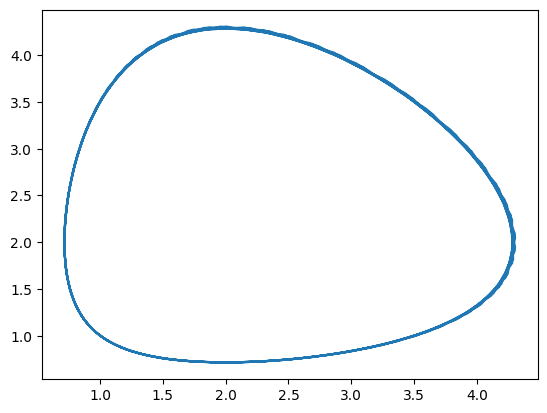

In [10]:
plt.plot(sol[:,0],sol[:,1])

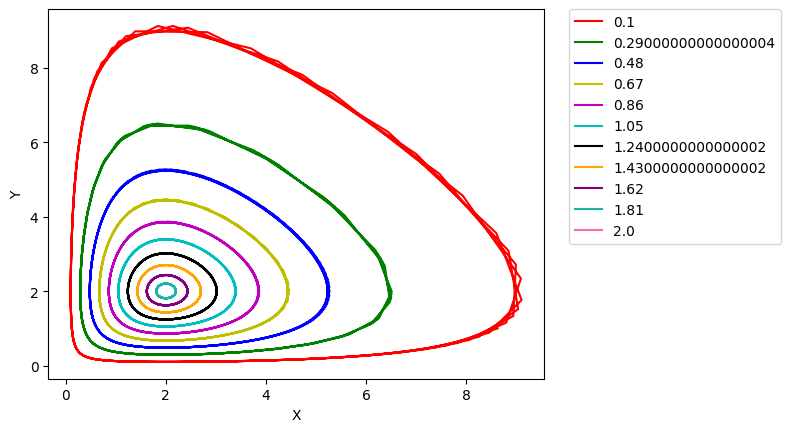

In [11]:
# PLOT X vs Y for various staring points (x0,y0)=(x0,2.)
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'orange', 'purple', '#20B2AA', '#FF69B4']
for i,x in enumerate(np.linspace(0.1,2,11)):
    r0=[x,2.]
    sol=scipy.integrate.odeint(rate_vector,r0,t,args=params)
    plt.plot(sol[:,0],sol[:,1],colors[i],label=str(x))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

***

<a id='jacobian'>
## Task-5: Using SymPy, find the Jacobian (at any arbitrary point), and hence the Jacobian at steady state(/s)
</a>

SymPy is a bit cumbersome, you have keep track of 'variable' and 'value' types; symbolic manipulations can only be done on 'variables' and not on values (values are for typically only the arthemetic operations). Most of the code for the task is given, but try to code on your own first and then you will understand the code better.

***

In [12]:
x=sympy.Symbol('x')
y=sympy.Symbol('y')

In [13]:
rMatrix = rate_vector([x,y],1,*params)
print(rMatrix)

[-1.0*x*y + 2.0*x, 1.0*x*y - 2.0*y]


In [14]:
rv2=sympy.Matrix(rMatrix)
print(rv2)

Matrix([[-1.0*x*y + 2.0*x], [1.0*x*y - 2.0*y]])


In [15]:
jacobian=sympy.Matrix(rv2).jacobian(sympy.Matrix([x,y]))
print(jacobian)

Matrix([[2.0 - 1.0*y, -1.0*x], [1.0*y, 1.0*x - 2.0]])


In [16]:
j2=(jacobian.subs(x,steadystate_nontrivial[0])).subs(y,steadystate_nontrivial[1])
print(j2)

Matrix([[-1.95399252334028e-14, -2.00000000000002], [2.00000000000002, 1.95399252334028e-14]])


In [17]:
j1=(jacobian.subs(x,steadystate_trivial[0])).subs(y,steadystate_trivial[1])
print(j1)

Matrix([[2.00000000000000, 0], [0, -2.00000000000000]])


In [18]:
# Convert j1 to a numeric array
j1 = np.array(j1, dtype=float)
print(j1)

[[ 2.  0.]
 [ 0. -2.]]


In [19]:
np.linalg.eig(j1)

EigResult(eigenvalues=array([ 2., -2.]), eigenvectors=array([[1., 0.],
       [0., 1.]]))

In [20]:
j2=np.array(j2,dtype=float)
print(j2)

[[-1.95399252e-14 -2.00000000e+00]
 [ 2.00000000e+00  1.95399252e-14]]


In [21]:
np.linalg.eig(j2)

EigResult(eigenvalues=array([0.+2.j, 0.-2.j]), eigenvectors=array([[ 6.86664530e-15-0.70710678j,  6.86664530e-15+0.70710678j],
       [-7.07106781e-01+0.j        , -7.07106781e-01-0.j        ]]))

***
<a id='geometric'>
## Task-6: Geometric Interpretation of Matrix (through its operation on vectors)
</a>
***

One of the common operations is matrix operation on vector, and many of the times of specific interest is multiple repeated operations of matrix on vector.

Consider $\textbf A$, an arbitrary $2\times 2$ matrix. For a arbirtary unit vector $\vec x$, plot $\textbf A \vec x$. From this plot, can you generalise the operation $\textbf A \vec x$.

Let matrix be $\textbf{A}$ of size $N\times N$ and column vector $\vec x$ of $N$ rows. Of interest is understanding $\textbf A \vec x$ and $\textbf A^n \vec x$. A common solution is to find the eigen values and eigen vectors of matrix $\textbf A$, i.e. solutions of eigen system $\textbf A \vec v = \lambda \vec v$ allows for $N$ solutions i.e.  pairs $(\lambda_i,\vec v_i)$ solve $\textbf A \vec v_i = \lambda_i \vec v_i$ for $1\le i \le N$, such that $\lambda_i \le \lambda_j$ when $i \le j$. When determinant of matrix is not zero (i.e. $\det \textbf A \ne 0$), the set of  vectors $\{\vec v_i,~i\in[1,N]\}$ form linearly independent set, and can act as basis vectors. [__Gram-Smidt Orthoganlization__](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process) can convert these eigen vectors into ortho-normal vectors, i.e. $\vec v_i \cdot \vec v_j = \delta_{i,j}$, where Kroneker delta function $\delta_{i,j}=1$ when $i=j$ and 0 otherwise.

Any vector $\vec x$ can be written as linear combination of such basis vectors, i.e. $\vec x = \sum_{i=1}^N c^{(0)}_i \vec v_i$ with constants $c^{(0)}_i$. So that $\textbf A \vec x = \sum_{i=1}^N c^{(1)}_i \vec v_i$, with $c^{(1)}_i = \lambda_i c^{(0)}_i$. For a repeated operation of $\textbf A$, we have $\textbf A^k \vec x = \sum_{i=1}^N c^{(k)}_i \vec v_i$ with $c^{(k)}_i = \lambda^k_i c^{(0)}_i$.

For the matrix $\textbf A$, find the eigen values and eigen vectors. Draw projection of an arbitrary unit vector $\vec x$ onto the eigen vectors. Do the same for $\vec b$ where $\vec b = \textbf A \vec x$. Try for a few cases of $\vec x$ and see if the above statements regarding $A^k\vec x$ are true (for $k=1$)

eigenvalues: [-0.06796896  0.98083989]
eigenvectors: [[-0.82456484  0.56576746]
 [-0.41597356 -0.90937671]]


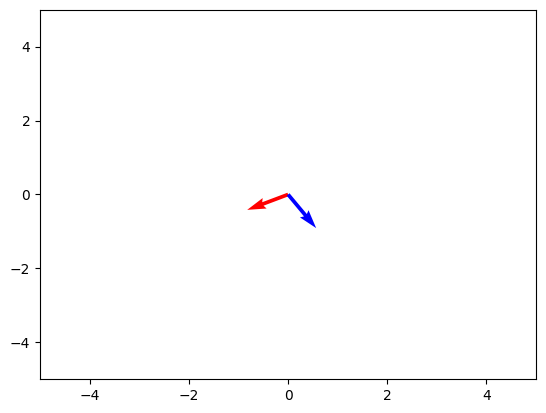

Orthonormal basis: [[-0.82456484  0.56576746]
 [-0.56576746 -0.82456484]]
Projections for x: [-0.95396353 -1.26093362]
[0.45643546 1.18673221]
Projections for b: [ 0.29505384 -1.23677399]


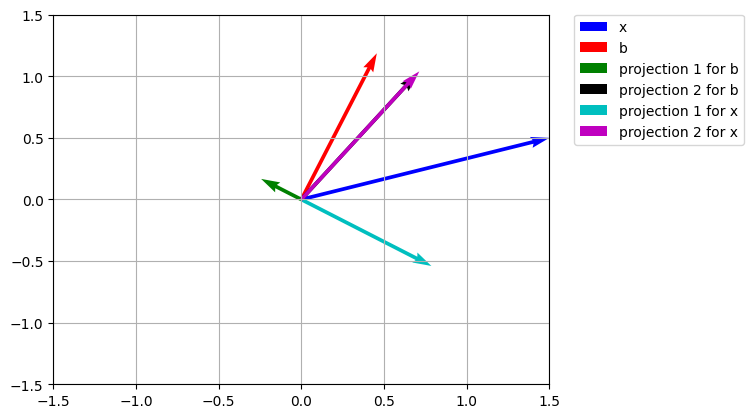

In [25]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1, 2], [3, 4]]) #set matrix
A = A/np.linalg.norm(A) #normalize matrix
eigenvalues, eigenvectors = np.linalg.eig(A) #get eigenvalues and eigenvectors
eigenvectors = eigenvectors.T #transpose eigenvectors

print(f'eigenvalues: {eigenvalues}')
print(f'eigenvectors: {eigenvectors}')

#plot eigenvectors
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.quiver(0,0,eigenvectors[0,0],eigenvectors[1,0],angles='xy',scale_units='xy',scale=1,color='r')
plt.quiver(0,0,eigenvectors[0,1],eigenvectors[1,1],angles='xy',scale_units='xy',scale=1,color='b')
plt.show()

eigenvalues = eigenvalues.T

def gram_schmidt(vectors):
    basis = []
    for v in vectors:
        w = v - np.sum([np.dot(v,b)*b for b in basis], axis=0)
        if (np.abs(w) > 1e-10).any():  
            basis.append(w/np.linalg.norm(w))
    return np.array(basis)

orthonormal_basis = gram_schmidt(eigenvectors)
print(f'Orthonormal basis: {orthonormal_basis}') #the orthonormal basis is found

x = np.array([1.5,0.5])
projection_x = np.dot(orthonormal_basis, x)
print(f"Projections for x: {projection_x}")

#multiply A and x
b = A@x
print(b)

# find b's projections on the orthonormal basis
projection_b = np.dot(orthonormal_basis, b)
print(f'Projections for b: {projection_b}')

# plot the projection
plt.figure()
plt.quiver(0, 0, x[0], x[1], angles='xy',scale_units='xy',scale=1,color='b',label='x')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='r', label='b')
colors_for_b = ['g', 'black']
colors_for_x = ['c', 'm']
for i, p in enumerate(projection_b):
    plt.quiver(0, 0, p * orthonormal_basis[i][0], p * orthonormal_basis[i][1], angles='xy', scale_units='xy', scale=1, label=f'projection {i+1} for b', color=colors_for_b[i])
for i, p in enumerate(projection_x):
    plt.quiver(0, 0, p * orthonormal_basis[i][0], p * orthonormal_basis[i][1], angles='xy', scale_units='xy', scale=1, label=f'projection {i+1} for x', color=colors_for_x[i])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

***
<a id='eigensystem'>
## Task: Find the value of the Jacobian at the steady state(or states), and find the eigenvalues and corresponding eigenvectors
</a>
***

With these eigen values and eigen values, determine the behaviour of the system in the neighbourhood of each steady state.

In [115]:
# Define the symbols x and y
x = sympy.Symbol('x')
y = sympy.Symbol('y')

# Calculate the rate vector for the given parameters
matrixR = rate_vector([x,y],1,*params)
print(matrixR)

# Convert the rate vector to a sympy Matrix
matrixR = sympy.Matrix(matrixR)
print(matrixR)

# Calculate the Jacobian of the rate vector with respect to [x, y]
jacobian = matrixR.jacobian(sympy.Matrix([x,y]))
print(jacobian)

# Substitute the trivial steady state values into the Jacobian
jacobian1 = jacobian.subs(x,steadystate_trivial[0]).subs(y,steadystate_trivial[1])
print(jacobian1)

# Substitute the non-trivial steady state values into the Jacobian
jacobian2 = jacobian.subs(x,steadystate_nontrivial[0]).subs(y,steadystate_nontrivial[1])
print(jacobian2)

# Convert the Jacobian to a numpy array and calculate the eigenvalues and eigenvectors for the trivial steady state
jacobian1 = np.array(jacobian1, dtype=float)
eigenvalues1, eigenvectors1 = np.linalg.eig(jacobian1)
print(f"Eigenvalues for trivial steady state: {eigenvalues1}")
print(f"Eigenvectors for trivial steady state: {eigenvectors1}")

# Convert the Jacobian to a numpy array and calculate the eigenvalues and eigenvectors for the non-trivial steady state
jacobian2 = np.array(jacobian2, dtype=float)
eigenvalues2, eigenvectors2 = np.linalg.eig(jacobian2)
print(f"Eigenvalues for non-trivial steady state: {eigenvalues2}")
print(f"Eigenvectors for non-trivial steady state: {eigenvectors2}")

[-1.0*x*y + 2.0*x, 1.0*x*y - 2.0*y]
Matrix([[-1.0*x*y + 2.0*x], [1.0*x*y - 2.0*y]])
Matrix([[2.0 - 1.0*y, -1.0*x], [1.0*y, 1.0*x - 2.0]])
Matrix([[2.00000000000000, 0], [0, -2.00000000000000]])
Matrix([[-1.95399252334028e-14, -2.00000000000002], [2.00000000000002, 1.95399252334028e-14]])
Eigenvalues for trivial steady state: [ 2. -2.]
Eigenvectors for trivial steady state: [[1. 0.]
 [0. 1.]]
Eigenvalues for non-trivial steady state: [0.+2.j 0.-2.j]
Eigenvectors for non-trivial steady state: [[ 6.86664530e-15-0.70710678j  6.86664530e-15+0.70710678j]
 [-7.07106781e-01+0.j         -7.07106781e-01-0.j        ]]


# Answer

Here, the stability of the steady states is judged using the Jacobian. The Jacobian is given by,

$$ J = \begin{bmatrix} \frac{\partial f}{\partial X} & \frac{\partial f}{\partial Y} \\ \frac{\partial g}{\partial X} & \frac{\partial g}{\partial Y} \end{bmatrix} $$

where $f$ and $g$ are the rate equations for prey and predator respectively.

The eigenvalues of the Jacobian matrix determine the stability of the steady states. If the real part of the eigenvalues are negative, the steady state is stable. If the real part of the eigenvalues are positive, the steady state is unstable. 

Thus, in the neighborhood of the steady states, we observe that the non-trivial steady state acts as a center. This means that the trajectories in phase space are closed curves surrounding this point, indicating a cyclic behavior of the predator-prey system. This cyclic behavior is characteristic of predator-prey models, representing the oscillations in the populations of predators and prey, showing the stable equilibrium at this steady state.

In the neighborhood of the trivial steady state, the trajectories in phase space are straight lines pointing towards the non-trivial steady state. This indicates the instability of the trivial steady state and shows that it is an unstable equilibrium. This implies that near the trivial steady state, any disturbances in the population of prey or predator may lead to unbounded growth of either of the species.